# Bootstrap confidence intervals

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#ECDF 
def ecdf(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    
    return x,y

## *Visualizing bootstrap samples

In [3]:
rainfall = np.array([   875.5,   648.2,   788.1,   940.3,   491.1,   743.5,   730.1,
                        686.5,   878.8,   865.6,   654.9,   831.5,   798.1,   681.8,
                        743.8,   689.1,   752.1,   837.2,   710.6,   749.2,   967.1,
                        701.2,   619. ,   747.6,   803.4,   645.6,   804.1,   787.4,
                        646.8,   997.1,   774. ,   734.5,   835. ,   840.7,   659.6,
                        828.3,   909.7,   856.9,   578.3,   904.2,   883.9,   740.1,
                        773.9,   741.4,   866.8,   871.1,   712.5,   919.2,   927.9,
                        809.4,   633.8,   626.8,   871.3,   774.3,   898.8,   789.6,
                        936.3,   765.4,   882.1,   681.1,   661.3,   847.9,   683.9,
                        985.7,   771.1,   736.6,   713.2,   774.5,   937.7,   694.5,
                        598.2,   983.8,   700.2,   901.3,   733.5,   964.4,   609.3,
                        1035.2,   718. ,   688.6,   736.8,   643.3,  1038.5,   969. ,
                        802.7,   876.6,   944.7,   786.6,   770.4,   808.6,   761.3,
                        774.2,   559.3,   674.2,   883.6,   823.9,   960.4,   877.8,
                        940.6,   831.8,   906.2,   866.5,   674.1,   998.1,   789.3,
                        915. ,   737.1,   763. ,   666.7,   824.5,   913.8,   905.1,
                        667.8,   747.4,   784.7,   925.4,   880.2,  1086.9,   764.4,
                        1050.1,   595.2,   855.2,   726.9,   785.2,   948.8,   970.6,
                        896. ,   618.4,   572.4,  1146.4,   728.2,   864.2,   793. ])

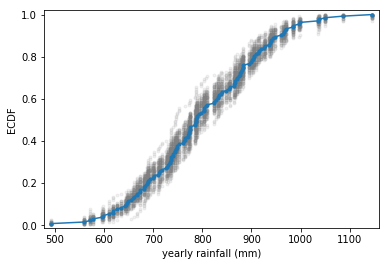

In [4]:
# 50 lists
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))
    ##print(bs_sample)
    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

In [5]:
## *Generating many bootstrap replicates

In [6]:
#Bootstrap_replicate_1d
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [7]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

######## More simple codes to Generate many bootstrap replicates
#def draw_bs_reps(data, func, size=1):
#    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

## *Bootstrap replicates of the mean and the SEM

10.510549150506188
10.480765649243404


/Users/jiwanhwang/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


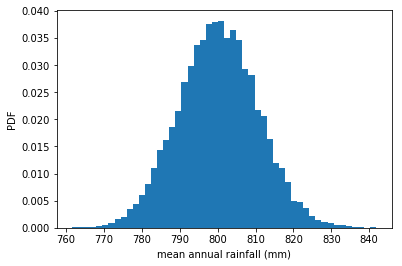

In [8]:
#Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, size=10000)

# Compute and print SEM (Strandard Error of the Mean)
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

## *Bootstrap replicates of other statistics (Variance)

[13391.87171236 15129.721151   12912.22320877 ... 16118.78993047
 12782.43512013 17156.86014811]


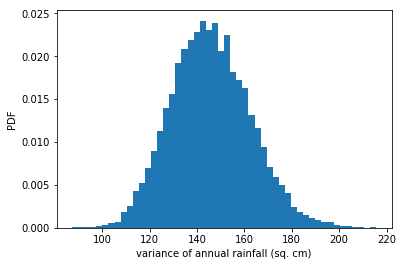

In [9]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, 10000)
print(bs_replicates)
# Put the variance in units of square centimeters
x= bs_replicates/100

# Make a histogram of the results
_ = plt.hist(x, bins=50, normed=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

## *Confidence interval on the rate of no-hitters

In [10]:
#Numpy array 'nohitter_tiems'
nohitter_times = np.array([843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

95% confidence interval = [659.0247012  870.93426295] games


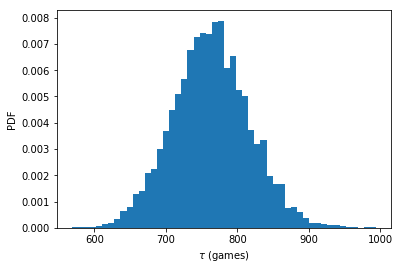

In [11]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, 10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

## *A function to do pairs bootstrap

In [12]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y,1)

    return bs_slope_reps, bs_intercept_reps

## *Pairs bootstrap of literacy/fertility data

In [13]:
#Read dataset
a = pd.read_csv('https://assets.datacamp.com/production/repositories/470/datasets/f1e7f8a98c18da5c60b625cb8af04c3217f4a5c3/female_literacy_fertility.csv')

#illiteracy
a['illiterate_perc'] = 100 - a['female literacy']

# Make np array
illiteracy = np.array(a['illiterate_perc'])
fertility = np.array(a['fertility'])


[0.04387922 0.05532645]


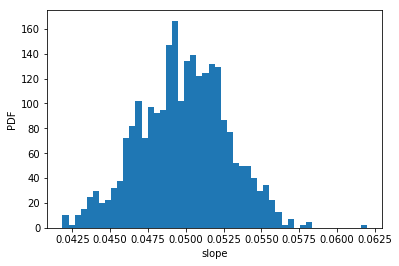

In [14]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

## *Plotting bootstrap regressions

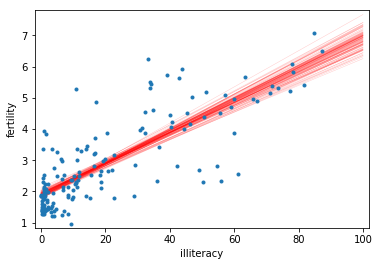

In [15]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()